## **Obtencion de datos**

Con ayuda de MediaPipe, se generaron coordenadas tridimensionales (x, y, z) para cada articulación, las cuales componen el conjunto de datos base.

Primero, se asignó una etiqueta que funcionará como la clase en cada frame, permitiendo identificar la acción que se realiza en el video y extrayendo las coordenadas tridimensionales de las articulaciones.

- 0 - nose
- 1 - left eye (inner)
- 2 - left eye
- 3 - left eye (outer)
- 4 - right eye (inner)
- 5 - right eye
- 6 - right eye (outer)
- 7 - left ear
- 8 - right ear
- 9 - mouth (left)
- 10 - mouth (right)
- 11 - left shoulder
- 12 - right shoulder
- 13 - left elbow
- 14 - right elbow
- 15 - left wrist
- 16 - right wrist
- 17 - left pinky
- 18 - right pinky
- 19 - left index
- 20 - right index
- 21 - left thumb
- 22 - right thumb
- 23 - left hip
- 24 - right hip
- 25 - left knee
- 26 - right knee
- 27 - left ankle
- 28 - right ankle
- 29 - left heel
- 30 - right heel
- 31 - left foot index
- 32 - right foot index

Se decidió agrupar cada 5 frames para asegurar un entrenamiento adecuado del modelo. Esto permite que el modelo detecte cambios significativos en las coordenadas, algo que sería más difícil si se analizara cada frame por separado. Al agrupar los frames, el modelo puede captar mejor el cambio en las coordenadas a través de diferentes movimientos, proporcionando contexto sobre cómo el cuerpo cambia de posición en el tiempo. Estos patrones temporales son esenciales para que el modelo aprenda a reconocer los movimientos en contexto; con solo un frame, no se percibiría esta progresión.

Además, los datos se almacenan en forma de vectores, lo cual es fundamental para que el modelo de IA procese eficientemente la información. Los modelos de IA están optimizados para trabajar con vectores de características, donde cada coordenada en varios frames ayuda a definir el patrón del movimiento.

Ventajas de agrupar en vectores:

* **Mejor representación del movimiento:** Al agrupar frames, el modelo puede observar cómo cambian las articulaciones en varios momentos, lo cual es esencial para detectar patrones de movimiento.
* **Menos datos, más información:** Al procesar una secuencia de frames en lugar de frames individuales, el modelo entiende el movimiento como una secuencia completa, facilitando el entrenamiento.
* **Reducción de ruido:** Agrupar los frames evita que el modelo se ajuste a variaciones aleatorias en un solo frame, permitiéndole captar el patrón general de movimiento sin distracciones.

Para cada frame:
* 495 columnas de coordenadas (33 articulaciones * 3 coordenadas)
* 1 columna de etiqueta de actividad

Estructura del Dataset:
* 495 columnas para coordenadas de articulaciones
* 1 columna para la etiqueta de actividad (ej. "Sentarse", "Girando")

Finalmente, los datos de cada video fueron combinados en un solo dataset que reúne toda la información.

In [1]:
%pip install MediaPipe
%pip install Pandas
%pip install numpy
%pip install seaborn
%pip install joblib
%pip install cv2

Note: you may need to restart the kernel to use updated packages.Collecting MediaPipe
  Using cached mediapipe-0.10.18-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached jax-0.4.35-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.35-cp312-cp312-win_amd64.whl.metadata (1.0 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached protobuf-4.25.5-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.1-py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached sentencepiece-0.2.0-cp312-cp312-win_amd64.whl.metadata (8.3 kB)
  Using cached cffi-1.17.1-cp312-cp312-win_amd64.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.5.0-cp312-cp31

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.24.0 requires networkx>=2.8, which is not installed.
scikit-learn 1.5.1 requires joblib>=1.2.0, which is not installed.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.5 MB 7.2 MB/s eta 0:00:02
   ------------- -------------------------- 3.9/11.5 MB 10.7 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.5 MB 11.7 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 12.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for cv2


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [45]:
df = pd.read_csv('dataset.csv')
# df = df.iloc[:, 1:]

In [46]:
df.head()

,x0_0,y0_0,z0_0,x0_1,y0_1,z0_1,x0_2,y0_2,z0_2,x0_3,...,x4_30,y4_30,z4_30,x4_31,y4_31,z4_31,x4_32,y4_32,z4_32,label
0,0.469561,0.343114,-0.387553,0.481351,0.336335,-0.358736,0.486875,0.336921,-0.358783,0.491551,...,0.454520,0.748187,0.174716,0.574247,0.761621,-0.023328,0.427931,0.769029,-0.045924,Acercarse
1,0.469586,0.343158,-0.398207,0.481225,0.336525,-0.369602,0.486389,0.337026,-0.369631,0.491401,...,0.453831,0.748131,0.184002,0.573457,0.761978,0.002404,0.429126,0.768019,-0.036509,Acercarse
2,0.469604,0.343047,-0.397147,0.481145,0.336525,-0.368460,0.486092,0.337017,-0.368493,0.491336,...,0.453476,0.748062,0.189366,0.572912,0.762168,0.007167,0.429927,0.767311,-0.031656,Acercarse
3,0.469600,0.342724,-0.400142,0.481031,0.336392,-0.371365,0.485775,0.336857,-0.371394,0.491209,...,0.453134,0.748052,0.193586,0.572595,0.762309,0.010703,0.430407,0.766954,-0.029172,Acercarse
4,0.469577,0.342563,-0.405092,0.480899,0.336244,-0.376734,0.485454,0.336690,-0.376760,0.490959,...,0.453099,0.748038,0.196072,0.572375,0.762339,0.010328,0.430574,0.766709,-0.026384,Acercarse


In [47]:
df.shape

(3286, 496)

In [48]:
df.describe()

,x0_0,y0_0,z0_0,x0_1,y0_1,z0_1,x0_2,y0_2,z0_2,x0_3,...,z4_29,x4_30,y4_30,z4_30,x4_31,y4_31,z4_31,x4_32,y4_32,z4_32
count,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,...,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000
mean,0.515436,0.286808,-0.024653,0.517191,0.275676,-0.023861,0.518609,0.275708,-0.023922,0.519788,...,0.165918,0.524216,0.840097,0.097193,0.573170,0.850517,0.015555,0.553132,0.856404,-0.047968
std,0.153546,0.114783,0.332945,0.152004,0.114759,0.303959,0.150757,0.114275,0.303968,0.149599,...,0.217229,0.107267,0.063648,0.262582,0.167580,0.065601,0.236649,0.182858,0.067228,0.271752
min,0.049665,-0.151430,-0.994480,0.046123,-0.171452,-0.960590,0.049749,-0.169108,-0.961040,0.053711,...,-0.620352,0.310489,0.499481,-0.655936,0.170629,0.707338,-0.850952,0.186839,0.489458,-0.937356
25%,0.431566,0.209078,-0.267764,0.432466,0.196229,-0.243382,0.435228,0.196392,-0.243506,0.435357,...,0.017679,0.433839,0.802512,-0.105019,0.485528,0.799025,-0.160180,0.399595,0.817146,-0.233118
50%,0.488575,0.299726,-0.015866,0.496336,0.290257,-0.004759,0.497858,0.290572,-0.004806,0.501821,...,0.177939,0.519775,0.835017,0.064890,0.592929,0.845015,0.012189,0.516841,0.853007,-0.075107
75%,0.592265,0.369331,0.174396,0.587712,0.359254,0.176954,0.586748,0.359429,0.176903,0.584489,...,0.320366,0.608032,0.870025,0.288598,0.681624,0.882115,0.217475,0.707693,0.885745,0.145539
max,0.888884,0.564006,1.109500,0.892682,0.555665,1.050854,0.890990,0.554497,1.050931,0.888811,...,0.979058,0.879821,1.083434,1.218958,0.895424,1.145268,0.656114,0.929723,1.139892,0.845935


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Columns: 496 entries, x0_0 to label
dtypes: float64(495), object(1)
memory usage: 12.4+ MB


In [50]:
df.dtypes

x0_0     float64
y0_0     float64
z0_0     float64
x0_1     float64
y0_1     float64
          ...   
z4_31    float64
x4_32    float64
y4_32    float64
z4_32    float64
label     object
Length: 496, dtype: object

In [51]:
# Missing values
df.isnull().sum()

x0_0     0
y0_0     0
z0_0     0
x0_1     0
y0_1     0
        ..
z4_31    0
x4_32    0
y4_32    0
z4_32    0
label    0
Length: 496, dtype: int64

In [52]:
# Duplicated values
df.duplicated().sum()

0

In [53]:
# Check for outliers
numeric_columns = df.columns.drop('label')

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

print(f"Outliers \n{outliers}")

Outliers 
x0_0     210
y0_0      49
z0_0      31
x0_1     231
y0_1      37
        ... 
y4_31     99
z4_31      3
x4_32      0
y4_32    187
z4_32     12
Length: 495, dtype: int64


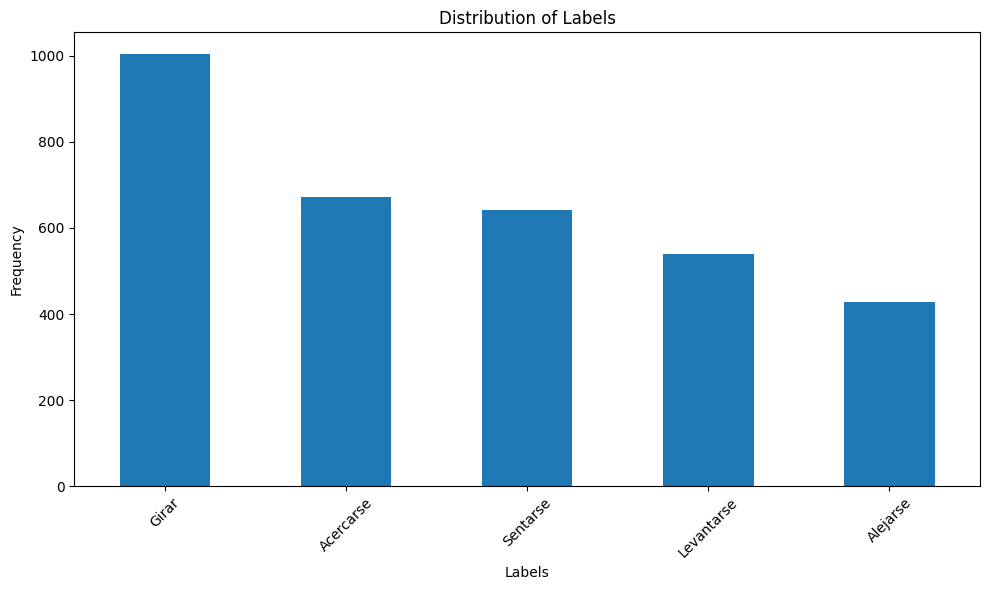

In [54]:
# Count the occurrences of each unique label
label_counts = df['label'].value_counts()

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
# Count each label
label_counts

label
Girar         1004
Acercarse      672
Sentarse       642
Levantarse     539
Alejarse       429
Name: count, dtype: int64

In [56]:
# Calculate the correlation matrix for the numeric columns
correlation_matrix = df[numeric_columns].corr()

print(f"correlation matrix \n{correlation_matrix}")

correlation matrix 
           x0_0      y0_0      z0_0      x0_1      y0_1      z0_1      x0_2  \
x0_0   1.000000  0.026306  0.121784  0.997306  0.022681  0.179746  0.994134   
y0_0   0.026306  1.000000  0.050503  0.021036  0.999642  0.082448  0.016857   
z0_0   0.121784  0.050503  1.000000  0.069931  0.048356  0.994053  0.036710   
x0_1   0.997306  0.021036  0.069931  1.000000  0.017463  0.127718  0.999263   
y0_1   0.022681  0.999642  0.048356  0.017463  1.000000  0.079943  0.013322   
...         ...       ...       ...       ...       ...       ...       ...   
y4_31  0.126410 -0.437935  0.144081  0.140409 -0.445283  0.154171  0.143652   
z4_31  0.397144  0.269536 -0.056150  0.375949  0.267289 -0.013066  0.369798   
x4_32  0.742175  0.224459  0.475665  0.705283  0.218253  0.532977  0.685890   
y4_32  0.270998 -0.391069  0.142007  0.279787 -0.399707  0.167186  0.281438   
z4_32 -0.549347  0.074436 -0.101787 -0.540033  0.076399 -0.172708 -0.537973   

           y0_2      z0_2      

## **Normalizacion centrada en el cuerpo**

Dado que los datos representan coordenadas de articulaciones, optaremos por centrar las coordenadas en una articulación específica del cuerpo, que  en este caso sera la cadera, que se mantendra como el "punto de referencia". Esto ayudaría a hacer las coordenadas invariantes a la posición general del cuerpo, lo cual es útil en tareas de reconocimiento de actividades.

In [58]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df y que tus coordenadas (x, y, z) están organizadas por articulación
# y tienes una columna llamada 'label' que queremos dejar sin normalizar.

# Creamos una copia del DataFrame para trabajar en los datos sin alterar el original
df_copy = df.copy()

# Separar las características y las etiquetas
X = df_copy.drop(columns=['label'])
y = df_copy['label']

# Normalización centrada en la cadera
# Obtener las coordenadas de referencia de la cadera (hip), en este caso, usando las articulaciones 23 (left_hip) y 24 (right_hip)
# Calculamos el promedio entre las dos caderas para tener un único punto de referencia central
X['hip_x'] = (X['x0_23'] + X['x0_24']) / 2
X['hip_y'] = (X['y0_23'] + X['y0_24']) / 2
X['hip_z'] = (X['z0_23'] + X['z0_24']) / 2

# Restamos el punto de referencia de cadera a todas las coordenadas (centrando)
for i in range(33):  # 33 puntos de referencia en MediaPipe
    X[f'x0_{i}'] -= X['hip_x']
    X[f'y0_{i}'] -= X['hip_y']
    X[f'z0_{i}'] -= X['hip_z']

# Eliminamos las columnas de referencia para no interferir en el entrenamiento
X = X.drop(columns=['hip_x', 'hip_y', 'hip_z'])

# Volvemos a unir las características normalizadas con las etiquetas en un solo DataFrame
df_normalized = pd.concat([X, y.reset_index(drop=True)], axis=1)

In [59]:
df_normalized.head()

,x0_0,y0_0,z0_0,x0_1,y0_1,z0_1,x0_2,y0_2,z0_2,x0_3,...,x4_30,y4_30,z4_30,x4_31,y4_31,z4_31,x4_32,y4_32,z4_32,label
0,-0.013456,-0.193423,-0.387577,-0.001666,-0.200201,-0.358761,0.003858,-0.199615,-0.358807,0.008534,...,0.454520,0.748187,0.174716,0.574247,0.761621,-0.023328,0.427931,0.769029,-0.045924,Acercarse
1,-0.013703,-0.194635,-0.398231,-0.002064,-0.201268,-0.369627,0.003100,-0.200768,-0.369656,0.008112,...,0.453831,0.748131,0.184002,0.573457,0.761978,0.002404,0.429126,0.768019,-0.036509,Acercarse
2,-0.013633,-0.195204,-0.397174,-0.002092,-0.201726,-0.368487,0.002855,-0.201235,-0.368519,0.008099,...,0.453476,0.748062,0.189366,0.572912,0.762168,0.007167,0.429927,0.767311,-0.031656,Acercarse
3,-0.013521,-0.195693,-0.400171,-0.002091,-0.202026,-0.371393,0.002654,-0.201561,-0.371423,0.008088,...,0.453134,0.748052,0.193586,0.572595,0.762309,0.010703,0.430407,0.766954,-0.029172,Acercarse
4,-0.013270,-0.195880,-0.405122,-0.001947,-0.202199,-0.376763,0.002608,-0.201753,-0.376790,0.008112,...,0.453099,0.748038,0.196072,0.572375,0.762339,0.010328,0.430574,0.766709,-0.026384,Acercarse


## **Estandarizacion**

Después de centrar los datos, vamos a aplicar una estandarización (media 0 y desviación estándar 1) para cada coordenada (x, y, z) de las articulaciones. Esto puede ayudar a mejorar la estabilidad del entrenamiento en algunos modelos, especialmente en redes neuronales.

In [61]:
from sklearn.preprocessing import StandardScaler
import joblib

# Aplicamos estandarización en las coordenadas centradas
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convertimos de nuevo a DataFrame
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

# Volvemos a unir con las etiquetas
df_standardized = pd.concat([X_standardized_df, y.reset_index(drop=True)], axis=1)

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [62]:
df_standardized.head()

,x0_0,y0_0,z0_0,x0_1,y0_1,z0_1,x0_2,y0_2,z0_2,x0_3,...,x4_30,y4_30,z4_30,x4_31,y4_31,z4_31,x4_32,y4_32,z4_32,label
0,-0.321422,0.843968,-1.090225,-0.237311,0.903479,-1.102009,-0.203390,0.918445,-1.101929,-0.173976,...,-0.649841,-1.444257,0.295280,0.006428,-1.355309,-0.164331,-0.684797,-1.299888,0.007522,Acercarse
1,-0.323554,0.826264,-1.122225,-0.240790,0.887975,-1.137757,-0.210091,0.901574,-1.137620,-0.177733,...,-0.656264,-1.445139,0.330648,0.001712,-1.349860,-0.055583,-0.678256,-1.314904,0.042173,Acercarse
2,-0.322946,0.817965,-1.119048,-0.241033,0.881320,-1.134007,-0.212254,0.894736,-1.133880,-0.177851,...,-0.659573,-1.446231,0.351081,-0.001537,-1.346960,-0.035450,-0.673874,-1.325442,0.060036,Acercarse
3,-0.321982,0.810823,-1.128049,-0.241020,0.876970,-1.143567,-0.214032,0.889960,-1.143431,-0.177944,...,-0.662762,-1.446386,0.367153,-0.003430,-1.344817,-0.020507,-0.671251,-1.330749,0.069177,Acercarse
4,-0.319807,0.808094,-1.142920,-0.239766,0.874454,-1.161236,-0.214436,0.887142,-1.161089,-0.177733,...,-0.663092,-1.446608,0.376621,-0.004742,-1.344353,-0.022094,-0.670338,-1.334393,0.079438,Acercarse


## **Entrenamiento de modelos con ajuste de hiperparametros**

Se dividira el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento de los modelos y asegurarnos de que no estamos sobreajustando.

Procederemos a probar varios modelos de clasificación comúnmente utilizados en el reconocimiento de actividades:

- K-Nearest Neighbors (KNN)
- Random Forest
- Support Vector Machine (SVM)
- Red Neuronal (MLPClassifier)

Para cada uno, incluiremos el ajuste de hiperparámetros mediante una búsqueda en cuadrícula (GridSearchCV).



In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

df = df_standardized.copy()
# Cargamos el DataFrame y separamos características y etiquetas
X = df.drop(columns=['label'])
y = df['label']

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diccionario para almacenar los modelos y sus hiperparámetros
models = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, None]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'MLP': (MLPClassifier(max_iter=500), {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001]})
}

# Almacenamos los mejores modelos y sus resultados
best_models = {}
for model_name, (model, params) in models.items():
    print(f'Entrenando modelo: {model_name}')
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

     # Guardar el modelo entrenado
    #joblib.dump(grid_search.best_estimator_, f'{model_name}_best_model.pkl')
    #print(f'Modelo {model_name} guardado como {model_name}_best_model.pkl')

    print(f'Mejores hiperparámetros para {model_name}: {grid_search.best_params_}')
    print(f'Mejor precisión en entrenamiento: {grid_search.best_score_}')

# Evaluación de los mejores modelos en el conjunto de prueba
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    print(f'\nEvaluación del modelo {model_name}')
    print(classification_report(y_test, y_pred))
    print(f'Precisión en el conjunto de prueba: {accuracy_score(y_test, y_pred)}')


Entrenando modelo: KNN
Mejores hiperparámetros para KNN: {'n_neighbors': 3}
Mejor precisión en entrenamiento: 0.9889639688575048
Entrenando modelo: RandomForest
Mejores hiperparámetros para RandomForest: {'max_depth': 20, 'n_estimators': 150}
Mejor precisión en entrenamiento: 0.9961933731667573
Entrenando modelo: SVM
Mejores hiperparámetros para SVM: {'C': 10, 'kernel': 'rbf'}
Mejor precisión en entrenamiento: 0.9821104472207134
Entrenando modelo: MLP
Mejores hiperparámetros para MLP: {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Mejor precisión en entrenamiento: 0.9965750497917798

Evaluación del modelo KNN
              precision    recall  f1-score   support

   Acercarse       1.00      1.00      1.00       158
    Alejarse       1.00      1.00      1.00        84
       Girar       1.00      1.00      1.00       188
  Levantarse       0.99      0.97      0.98       106
    Sentarse       0.98      0.99      0.98       122

    accuracy                           0.99       658
  

## **Reducción de Dimensionalidad de los Datos PCA**

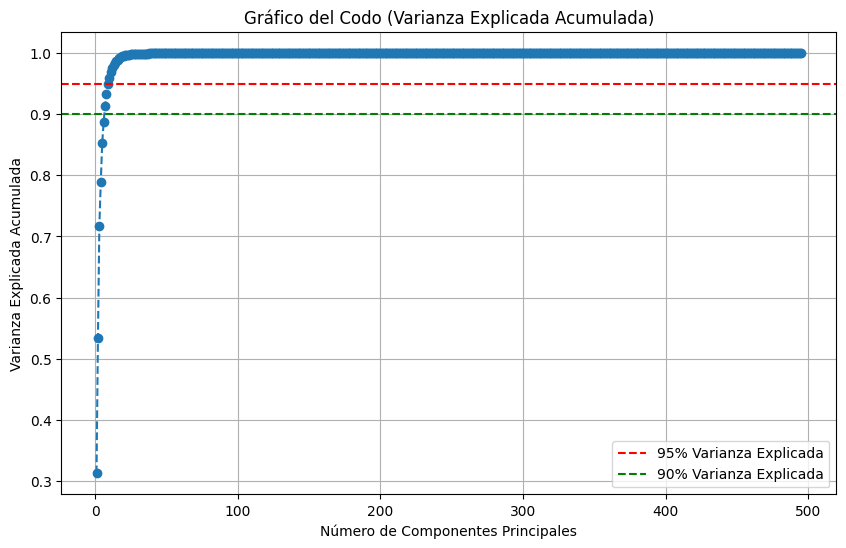

10

In [64]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Separar características y etiquetas del DataFrame original
X = df.drop(columns=['label'], axis=1)
y = df['label']

# Calcular la referencia de la cadera
X['hip_x'] = (X['x0_23'] + X['x0_24']) / 2
X['hip_y'] = (X['y0_23'] + X['y0_24']) / 2
X['hip_z'] = (X['z0_23'] + X['z0_24']) / 2

# Restar referencia de cadera a las coordenadas
for i in range(33):  # Suponiendo 33 puntos
    X[f'x0_{i}'] -= X['hip_x']
    X[f'y0_{i}'] -= X['hip_y']
    X[f'z0_{i}'] -= X['hip_z']

# Eliminar columnas de referencia
X = X.drop(columns=['hip_x', 'hip_y', 'hip_z'])

# Estandarización de los datos centrados
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Cálculo del gráfico del codo para determinar número de componentes PCA
pca_full = PCA()
pca_full.fit(X_train)
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Graficar el codo para PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Gráfico del Codo (Varianza Explicada Acumulada)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varianza Explicada')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Varianza Explicada')
plt.legend()
plt.grid(True)
plt.show()

# Determinar número de componentes para explicar 95% de la varianza
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
n_components_95

In [65]:
# Aplicar PCA con el número óptimo de componentes (10)
pca_optimal = PCA(n_components=n_components_95)
X_train_pca = pca_optimal.fit_transform(X_train)
X_test_pca = pca_optimal.transform(X_test)

# Mostrar la varianza explicada por los 10 componentes principales
explained_variance = pca_optimal.explained_variance_ratio_
print('Varianza explicada por los 10 componentes principales:')
for i, var in enumerate(explained_variance):
    print(f'Componente {i+1}: {var:.4f} - {var*100:.2f}%')

print(f'Total de varianza explicada: {sum(explained_variance)*100:.2f}%')

Varianza explicada por los 10 componentes principales:
Componente 1: 0.3123 - 31.23%
Componente 2: 0.2208 - 22.08%
Componente 3: 0.1846 - 18.46%
Componente 4: 0.0719 - 7.19%
Componente 5: 0.0630 - 6.30%
Componente 6: 0.0346 - 3.46%
Componente 7: 0.0256 - 2.56%
Componente 8: 0.0209 - 2.09%
Componente 9: 0.0154 - 1.54%
Componente 10: 0.0106 - 1.06%
Total de varianza explicada: 95.98%


In [67]:
import pickle
models_pca = {
    'KNN_PCA': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}),
    'RandomForest_PCA': (RandomForestClassifier(), {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, None]}),
    'SVM_PCA': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'MLP_PCA': (MLPClassifier(max_iter=1000), {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001]})
}

# Entrenamiento y evaluación de modelos con datos transformados mediante PCA
best_models_pca = {}

for model_name, (model, params) in models_pca.items():
    print(f'\nEntrenando modelo con datos PCA: {model_name}')
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_pca, y_train)
    best_models_pca[model_name] = grid_search.best_estimator_
    print(f'Mejores hiperparámetros para {model_name}: {grid_search.best_params_}')
    print(f'Mejor precisión en entrenamiento (PCA): {grid_search.best_score_}')

    y_pred_pca = best_models_pca[model_name].predict(X_test_pca)
    print(f'\nEvaluación del modelo {model_name} con datos PCA')
    print(classification_report(y_test, y_pred_pca))
    print(f'Precisión en el conjunto de prueba (PCA): {accuracy_score(y_test, y_pred_pca)}')

# Guardar el PCA
with open('pca.pkl', 'wb') as pca_file:
    pickle.dump(pca_optimal, pca_file)

# Guardar el modelo (MLP_PCA)
with open('best_model_MLP_PCA.pkl', 'wb') as model_file:
    pickle.dump(best_models_pca['MLP_PCA'], model_file)

# Guardar el modelo (RandomForest_PCA)
with open('best_model_RandomForest_PCA.pkl', 'wb') as model_file:
    pickle.dump(best_models_pca['RandomForest_PCA'], model_file)

# Guardar el modelo (MLP_PCA)
with open('best_model_SVM_PCA.pkl', 'wb') as model_file:
    pickle.dump(best_models_pca['SVM_PCA'], model_file)

# Guardar el modelo (MLP_PCA)
with open('best_model_KNN_PCA', 'wb') as model_file:
    pickle.dump(best_models_pca['KNN_PCA'], model_file)


Entrenando modelo con datos PCA: KNN_PCA
Mejores hiperparámetros para KNN_PCA: {'n_neighbors': 3}
Mejor precisión en entrenamiento (PCA): 0.9859214195183776

Evaluación del modelo KNN_PCA con datos PCA
              precision    recall  f1-score   support

   Acercarse       1.00      1.00      1.00       158
    Alejarse       1.00      1.00      1.00        84
       Girar       1.00      1.00      1.00       188
  Levantarse       0.97      0.98      0.98       106
    Sentarse       0.98      0.98      0.98       122

    accuracy                           0.99       658
   macro avg       0.99      0.99      0.99       658
weighted avg       0.99      0.99      0.99       658

Precisión en el conjunto de prueba (PCA): 0.9924012158054711

Entrenando modelo con datos PCA: RandomForest_PCA
Mejores hiperparámetros para RandomForest_PCA: {'max_depth': None, 'n_estimators': 50}
Mejor precisión en entrenamiento (PCA): 0.9832590983161327

Evaluación del modelo RandomForest_PCA con datos 

In [74]:
import joblib
import mediapipe as mp
import cv2
import numpy as np
from collections import deque

# MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

# Cargar el escalador y el modelo
scaler = joblib.load('scaler.pkl')
#real_time_model = joblib.load('MLP_best_model.pkl')

# Cargar PCA
with open('pca.pkl', 'rb') as pca_file:
    pca = pickle.load(pca_file)

# Cargar el modelo ajustado al PCA
with open('best_model_SVM_PCA.pkl', 'rb') as model_file:
    real_time_model = pickle.load(model_file)


# Parámetros para el buffer
NUM_FEATURES = 99  # Cantidad de características por frame
FRAMES_REQUIRED = 5  # Número de frames necesarios para el modelo
BUFFER_SIZE = FRAMES_REQUIRED

# Inicializa el buffer
frame_buffer = deque(maxlen=BUFFER_SIZE)

# Función para preprocesar landmarks (normalización centrada en cadera y estandarización)
def preprocess_landmarks(landmarks):
    # Extraer las coordenadas (x, y, z) de los 33 puntos
    keypoints = np.array([[lm.x, lm.y, lm.z] for lm in landmarks])

    # Obtener las coordenadas de las caderas (puntos 23 y 24 en MediaPipe)
    left_hip = keypoints[23]
    right_hip = keypoints[24]

    # Calcular el punto central de la cadera
    hip_center = (left_hip + right_hip) / 2

    # Restar el punto de referencia de todas las coordenadas (normalización centrada)
    keypoints -= hip_center

    # Aplanar las coordenadas para obtener un vector de entrada
    return keypoints.flatten()

# Función para mostrar actividad en la ventana
def mostrar_accion(frame, accion):
    """
    Dibuja la acción en el frame de la cámara.
    """
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, f'Actividad: {accion}', (10, 50), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Abrir la cámara
cap = cv2.VideoCapture(0)

print("Presiona 'q' para salir.")

# Procesamiento y predicción en tiempo real
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir la imagen a RGB
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Procesar la imagen con MediaPipe Pose
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark

        # Dibujar landmarks en la imagen
        mp_drawing.draw_landmarks(
            frame,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
            mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
        )

        # Preprocesar landmarks
        try:
            frame_features = preprocess_landmarks(landmarks)  # Extrae y normaliza los landmarks
            frame_buffer.append(frame_features)  # Agrega los datos al buffer

            # Si el buffer está lleno, concatenar los frames
            if len(frame_buffer) == BUFFER_SIZE:
                X_live = np.hstack(frame_buffer).reshape(1, -1)  # Vector concatenado
                X_live_scaled = scaler.transform(X_live)        # Estandarizar

                X_live = np.hstack(frame_buffer).reshape(1, -1)
                #print(f"Forma de X_live antes de PCA: {X_live.shape}")  # Debug del input al PCA

                # **Aplicar PCA a los datos**
                X_live_pca = pca.transform(X_live)
                #print(f"Forma de X_live después de PCA: {X_live_pca.shape}")  # Debug del input al modelo

                # Predecir actividad
                prediction = real_time_model.predict(X_live_pca)
                activity = prediction[0]  # Obtener la etiqueta

                # Mostrar la actividad en la ventana
                mostrar_accion(frame, activity)

                
            else:
                # Mensaje mientras se llena el buffer
                mostrar_accion(frame, "Cargando datos...")

        except Exception as e:
            print(f"Error en preprocesamiento o predicción: {e}")

    # Mostrar el video en tiempo real
    cv2.imshow('Actividad en tiempo real', frame)

    # Salir al presionar 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar recursos
cap.release()
cv2.destroyAllWindows()


Presiona 'q' para salir.


c:\Users\ricar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ricar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ricar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ricar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ricar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScal